## O conjunto de dados Reuters

* O conjunto de dados da Reuters éé composto de noticias curtas 1986. 
* É um conjunto de dados de _toy_ muito simples e amplamente usado para classificação de texto. 
* Existem 46 tópicos diferentes; alguns tópicos são mais representados do que outros, mas cada tópico tem pelo menos 10 exemplos no conjunto de treinamento.

In [ ]:
from keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(train_data, train_labels), (test_data, test_labels) = ## completar aqui

print(len(train_data))
print(len(test_data))
print(train_data[0])
print(train_labels[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


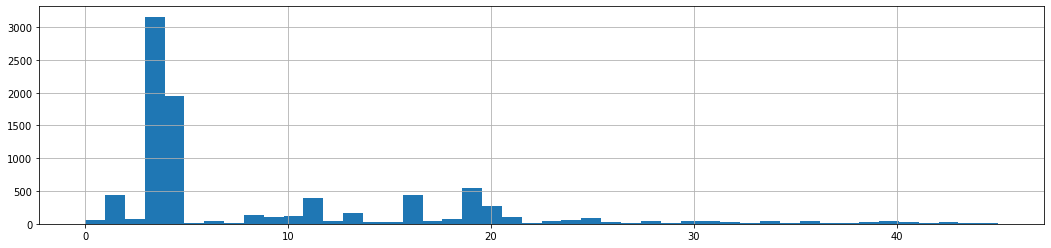

In [ ]:
# histograma dos rótulos

plt.figure(figsize=(18,4))
plt.hist(## completar aqui)
plt.grid()
plt.show()

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decodificamos a revisão; observe que nossos índices foram deslocados por 3
# porque 0, 1 e 2 são índices reservados para "padding", "start of sequence" 
# e "unknown". O índice 3 nunca éé utilizado.
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## Preparando os dados

Podemos vetorizar os dados exatamente com o mesmo código de nosso exemplo anterior

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    ## completar aqui

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
for i in range(20):
    print(x_train[0,i])

0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0


**One-hot nos rótulos**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

## Construindo nossa rede

Este problema de classificação de tópicos é multiclasse, onde o número de classes 46, ou seja, a dimensionalidade do espaço.

Detalhe: se uma camada descarta algumas informações relevantes para o problema de classificação, essas informações nunca podem ser recuperadas pelas camadas posteriores: cada camada pode se tornar um "gargalo de informações", descartando permanentemente informações relevantes.

In [ ]:
from keras import models
from keras import layers

def build_model():

    model = models.Sequential()
    ## completar aqui

    model.compile(## completar aqui)

    return model

model = build_model()

### Entropia Cruzada (Categórica)

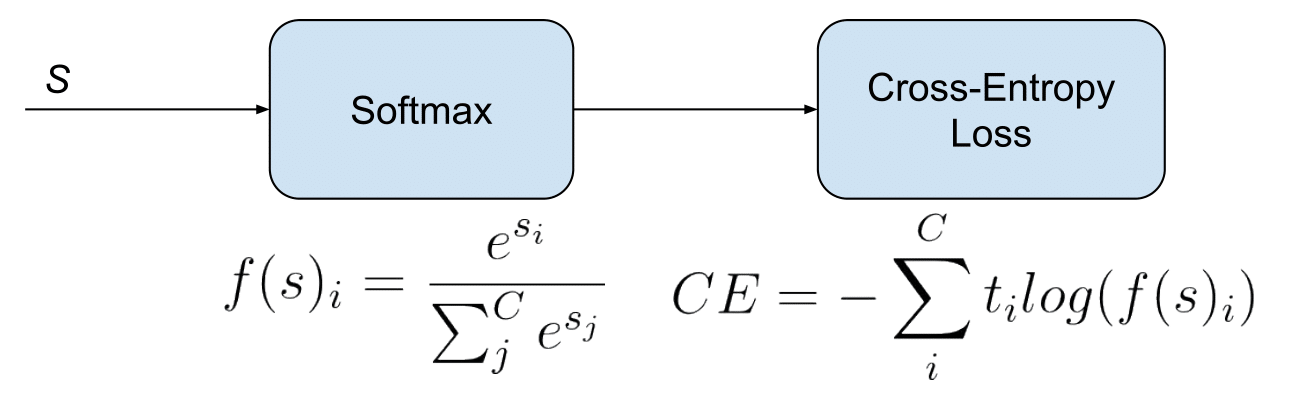

A **Categorical Cross-Entropy** também é chamada de perda de Softmax. É uma ativação Softmax e um cálculo de entropia cruzada. 

Esta perda é usad para classificação multi-classe. No caso específico da classificação **Multi-Classe**, os rótulos são one-hot, então apenas a classe positiva $C_p$ participa da perda. 

$CE = - \sum_i^C t_i \log(f(s)_i) $

Há apenas um elemento no vetor dos rótulos $t$ que é diferente de zero $t_i = t_p$. Portanto, descartando os elementos da soma que são zero podemos escrever:

$CE = -log \left (\frac{e^{s_{p}}} {\sum_{j}^{C} e^{s_{j}}} \right)$

Onde $s_p$ é a pontuação da camada softmax para a classe positiva.


---

**Visualização do modelo**

In [ ]:
from keras.utils import plot_model

plot_model(model, "model.png", show_shapes=True)

## Criando um conjunto de validação

In [ ]:
x_val = ## completar aqui
partial_x_train = ## completar aqui

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Treinamento

In [ ]:
history = model.fit(## completar aqui)

Epoch 1/20
16/16 [==============================] - 2s 99ms/step - loss: 2.6215 - accuracy: 0.4896 - val_loss: 1.7813 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 1.4196 - accuracy: 0.7151 - val_loss: 1.3076 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 1s 76ms/step - loss: 1.0298 - accuracy: 0.7856 - val_loss: 1.1257 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 1s 73ms/step - loss: 0.8111 - accuracy: 0.8309 - val_loss: 1.0581 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 74ms/step - loss: 0.6508 - accuracy: 0.8639 - val_loss: 0.9865 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 75ms/step - loss: 0.5269 - accuracy: 0.8891 - val_loss: 0.9413 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.4202 - accuracy: 0.9144 - val_loss: 0.9113 - val_accuracy: 0.8150
Epoch 8/20
16

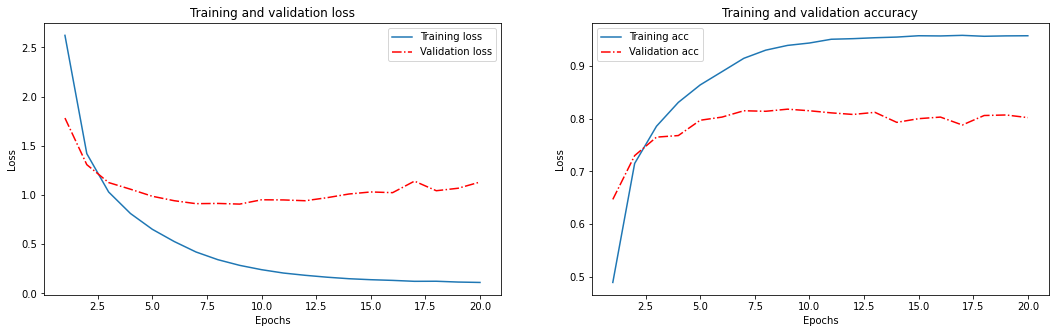

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, '-.r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, '-.r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Parece que a rede começa a overfitting após 8 épocas. Vamos treinar uma nova rede do zero por 8 épocas e, em seguida, avaliá-la no conjunto de teste:

In [ ]:
model2 = build_model()

model2.fit(partial_x_train,
          partial_y_train,
          ## completar aqui
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 1s 57ms/step - loss: 2.8683 - accuracy: 0.5124 - val_loss: 1.8780 - val_accuracy: 0.6480
Epoch 2/8
16/16 [==============================] - 1s 44ms/step - loss: 1.5231 - accuracy: 0.6996 - val_loss: 1.3594 - val_accuracy: 0.7190
Epoch 3/8
16/16 [==============================] - 1s 43ms/step - loss: 1.0977 - accuracy: 0.7684 - val_loss: 1.1698 - val_accuracy: 0.7630
Epoch 4/8
16/16 [==============================] - 1s 42ms/step - loss: 0.8536 - accuracy: 0.8211 - val_loss: 1.0555 - val_accuracy: 0.7830
Epoch 5/8
16/16 [==============================] - 1s 43ms/step - loss: 0.6756 - accuracy: 0.8579 - val_loss: 0.9923 - val_accuracy: 0.7820
Epoch 6/8
16/16 [==============================] - 1s 43ms/step - loss: 0.5414 - accuracy: 0.8882 - val_loss: 0.9659 - val_accuracy: 0.8010
Epoch 7/8
16/16 [==============================] - 1s 42ms/step - loss: 0.4381 - accuracy: 0.9126 - val_loss: 0.9364 - val_accuracy: 0.8050
Epoch 8/8
16/16 [===

In [ ]:
results = model2.## completar aqui
results

71/71 [==============================] - 0s 2ms/step - loss: 0.9810 - accuracy: 0.7890


[0.9810405969619751, 0.7889581322669983]

Nossa abordagem atinge uma precisão de 78%. 

## Comparação com um classificador aleatório

Se fosse um problema de classificação binária balanceada, a accuracia alcançada por um classificador puramente aleatório seria de 50%, mas neste exemplo multiclasse quanto seria essa proporção?

In [ ]:
## completar aqui

0.195013357079252

## Comparação contra a classe maioritária

In [ ]:
## completar aqui

0.3619768477292965

## Gerando previsões sobre novos dados


3


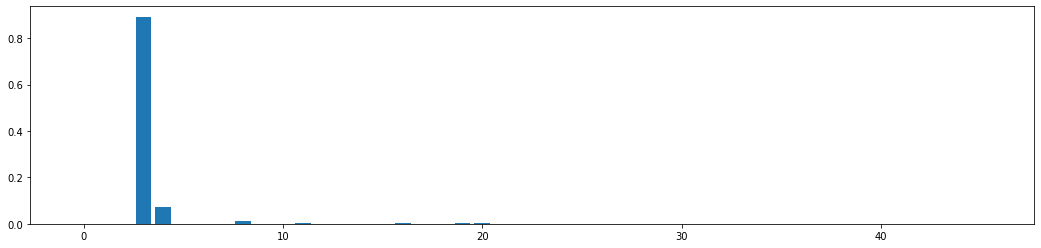

In [ ]:
predictions = model.## completar aqui

# print(predictions[0])
print(np.argmax(predictions[0]))

plt.figure(figsize=(18,4))
plt.bar(range(46),predictions[0])
plt.show()

## Model Checkpoint and Early Stopping

Um callback é um objeto que pode realizar ações em vários estágios de treinamento (por exemplo, no início ou no final de uma época).

**Model Checkpoint:** salva o modelo ou os pesos do modelo com alguma frequência. Este callback é usado para salvar um modelo em um arquivo que possa ser carregado posteriormente e continuar o treinamento no estado salvo.

**Early Stopping:** para o treinamento quando a métrica monitorada parar de melhorar. Assumindo que o objetivo de um treinamento é minimizar a Loss. Com isso, a métrica a ser monitorada seria 'loss' e o modo seria 'min'.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ## completar aqui

es = ## completar aqui

model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model3.fit(partial_x_train,
                     partial_y_train,
                     epochs=40,
                     batch_size=512,
                     validation_data=(x_val, y_val),
                     ## completar aqui)

In [ ]:
from keras.models import load_model

saved_model = ## completar aqui

# evaluate the model
train_loss, train_acc = saved_model.evaluate(## completar aqui )
test_loss, test_acc = saved_model.evaluate(## completar aqui )